# Table of contents
## 01 Setting up
## 02 Consistency checks
## 03 Choropleth maps

# 01 Setting up

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import folium
import os
import json

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
# import json file
country_geo = r"C:\Users\Anwender\Documents\10-2023 Happiness Project\02 Data\Original Data\world-countries.json"

In [4]:
country_geo

'C:\\Users\\Anwender\\Documents\\10-2023 Happiness Project\\02 Data\\Original Data\\world-countries.json'

In [5]:
# That's just in case you want to look at the JSON file contents here too:

f = open(r"C:\Users\Anwender\Documents\10-2023 Happiness Project\02 Data\Original Data\world-countries.json",)
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'properties': {'name': 'Afghanistan'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[61.210817, 35.650072], [62.230651, 35.270664], [62.984662, 35.404041], [63.193538, 35.857166], [63.982896, 36.007957], [64.546479, 36.312073], [64.746105, 37.111818], [65.588948, 37.305217], [65.745631, 37.661164], [66.217385, 37.39379], [66.518607, 37.362784], [67.075782, 37.356144], [67.83, 37.144994], [68.135562, 37.023115], [68.859446, 37.344336], [69.196273, 37.151144], [69.518785, 37.608997], [70.116578, 37.588223], [70.270574, 37.735165], [70.376304, 38.138396], [70.806821, 38.486282], [71.348131, 38.258905], [71.239404, 37.953265], [71.541918, 37.905774], [71.448693, 37.065645], [71.844638, 36.738171], [72.193041, 36.948288], [72.63689, 37.047558], [73.260056, 37.495257], [73.948696, 37.421566], [74.980002, 37.41999], [75.158028, 37.133031], [74.575893, 37.020841], [74.067552, 36.836176], [72.920025, 36.720007], [71.846292, 36.509942], [71.262348, 36.074388], [71.498768,

In [6]:
path = r"C:\Users\Anwender\Documents\10-2023 Happiness Project\02 Data\Prepared Data"

In [7]:
# import data
df = pd.read_pickle(os.path.join(path, "df2015_2019_dropped.pkl"))

In [8]:
df.head(20)

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015
5,Finland,Western Europe,6,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2015
6,Netherlands,Western Europe,7,7.378,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2015
7,Sweden,Western Europe,8,7.364,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2015
8,New Zealand,Australia and New Zealand,9,7.286,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2015
9,Australia,Australia and New Zealand,10,7.284,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2015


In [9]:
df.shape

(763, 11)

# 02. Consistency Checks

In [10]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Year                             0
dtype: int64

In [11]:
# checking for duplicates
dups = df.duplicated()
dups.shape # no dups

(763,)

<Axes: xlabel='Happiness Score', ylabel='Count'>

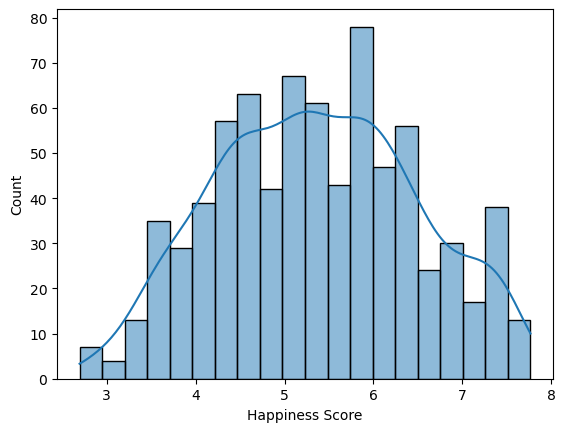

In [12]:
# Outliers check
sns.histplot(df["Happiness Score"], bins=20, kde = True) # shows extreme values for 'Happiness Score'

<Axes: xlabel='Economy (GDP per Capita)', ylabel='Count'>

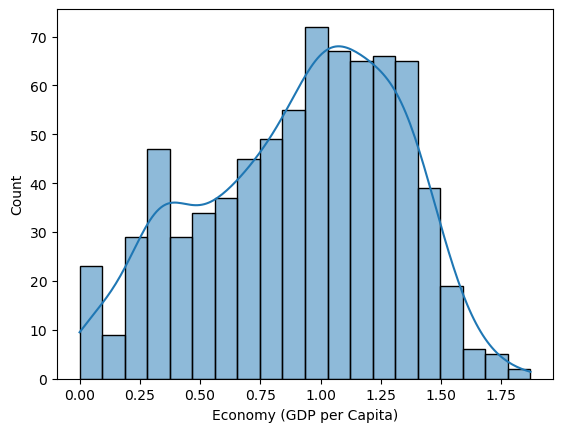

In [13]:
sns.histplot(df["Economy (GDP per Capita)"], bins=20, kde = True) # shows extreme values for Economy

<Axes: xlabel='Health (Life Expectancy)', ylabel='Count'>

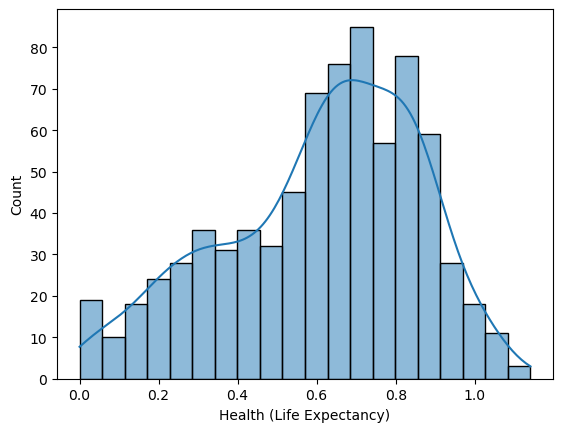

In [14]:
sns.histplot(df["Health (Life Expectancy)"], bins=20, kde = True) # shows extreme values for Health

<Axes: xlabel='Family', ylabel='Count'>

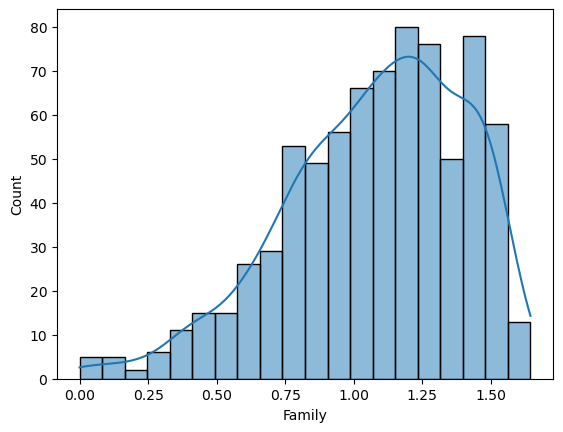

In [15]:
sns.histplot(df["Family"], bins=20, kde = True) # shows extreme values for Family

<Axes: xlabel='Freedom', ylabel='Count'>

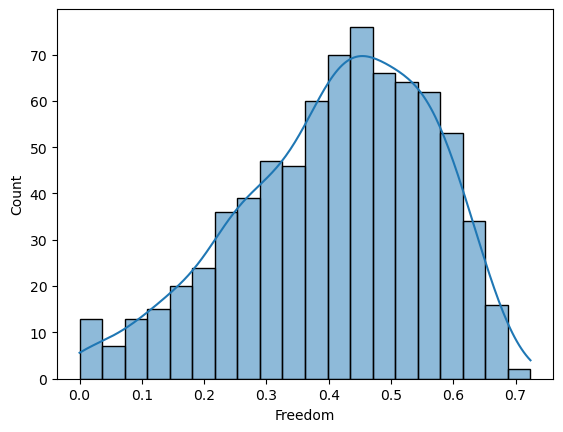

In [16]:
sns.histplot(df["Freedom"], bins=20, kde = True) # shows extreme values for Freedom

# 03. Choropleth maps

In [17]:
# creating subset for Happiness Score and Country
data_to_plot = df[["Country", "Happiness Score"]]
data_to_plot.head(20)

,Country,Happiness Score
0,Switzerland,7.587
1,Iceland,7.561
2,Denmark,7.527
3,Norway,7.522
4,Canada,7.427
5,Finland,7.406
6,Netherlands,7.378
7,Sweden,7.364
8,New Zealand,7.286
9,Australia,7.284


In [18]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [50, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot,
    columns = ["Country", "Happiness Score"],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Happiness Score").add_to(map)
folium.LayerControl().add_to(map)

map

Black-colored regions are not the happiest countries but rather those, that do not contain any information of their score (due to lack of survey takers)

USA is not colored in, because it's named differently in the JSON compared to the df. --> renaming it to match

In [19]:
# renaming United States to United States of America
data_to_plot = data_to_plot.replace(["United States"], "United States of America")

In [20]:
# creating another map with white-colored nan-locations
map2 = folium.Map(location = [50, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot,
    columns = ["Country", "Happiness Score"],
    key_on = 'feature.properties.name', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    nan_fill_color = "white",
    legend_name = "Happiness Score").add_to(map2)
folium.LayerControl().add_to(map2)

map2

In [21]:
# creating choropleth map for Economy x Happiness score:

economy_data = df[["Country", "Economy (GDP per Capita)"]]
economy_data.head()

,Country,Economy (GDP per Capita)
0,Switzerland,1.39651
1,Iceland,1.30232
2,Denmark,1.32548
3,Norway,1.45900
4,Canada,1.32629


In [22]:
# renaming United States to United States of America
economy_data = economy_data.replace(["United States"], "United States of America")

In [23]:
# creating another map with Economy-ratings
map3 = folium.Map(location = [50, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = economy_data,
    columns = ["Country", "Economy (GDP per Capita)"],
    key_on = 'feature.properties.name', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    nan_fill_color = "white",
    legend_name = "Economy").add_to(map3)
folium.LayerControl().add_to(map3)

map3

In [24]:
# creating a Economy/Happiness Score derivative to answer Hypothesis
# "If the Economy is poorly rated, then the Happiness Score is likely to be low as well."
df["Economy_Happiness_ratio"] = df["Economy (GDP per Capita)"]/df["Happiness Score"]
df

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year,Economy_Happiness_ratio
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015,0.184066
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015,0.172242
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015,0.176097
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015,0.193964
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015,0.178577
...,...,...,...,...,...,...,...,...,...,...,...,...
151,Rwanda,Sub-Saharan Africa,152,3.334,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700,2019,0.107678
152,Tanzania,Sub-Saharan Africa,153,3.231,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600,2019,0.147323
153,Afghanistan,Southern Asia,154,3.203,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800,2019,0.109273
154,Central African Republic,Sub-Saharan Africa,155,3.083,0.02600,0.00000,0.10500,0.22500,0.03500,0.23500,2019,0.008433


In [25]:
# renaming United States to United States of America
df["Country"] = df["Country"].replace(["United States"], "United States of America")

In [26]:
ratio_data = df[["Country", "Economy_Happiness_ratio"]]
ratio_data.head()

,Country,Economy_Happiness_ratio
0,Switzerland,0.184066
1,Iceland,0.172242
2,Denmark,0.176097
3,Norway,0.193964
4,Canada,0.178577


In [27]:
# creating a choropleth map for Economy/Happiness ration
map4 = folium.Map(location = [50,0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo,
    data = ratio_data,
    columns = ["Country", "Economy_Happiness_ratio"],
    key_on = "feature.properties.name",
    fill_color = "YlOrBr", fill_opacity = 0.6,
    nan_fill_color = "white",
    line_opacity = 0.1,
    legend_name = "Economy_Happiness_ratio").add_to(map4)

folium.LayerControl().add_to(map4)
map4

In [28]:
map2

From this comparison we can observe that the ratio of Economy/Happiness does not completely correlate to the overall Happiness. There are countries like Botswana, where the Happiness is not as highly rated as other countries, yet looking at the Economy/Happiness ratio, it is displayed as one with the highest rated. This does not apply to our actual data, as Botswana is not listed among the top 20 happiest countries. That must mean that their Happiness score is low and that their Economy value must be quite high.

In [29]:
df.loc[df["Country"] == "Botswana"]

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year,Economy_Happiness_ratio
127,Botswana,Sub-Saharan Africa,128,4.332,0.993550,1.104640,0.047760,0.494950,0.124740,0.104610,2015,0.229351
136,Botswana,Sub-Saharan Africa,137,3.974,1.094260,0.891860,0.347520,0.440890,0.107690,0.124250,2016,0.275355
141,Botswana,Sub-Saharan Africa,142,3.766,1.122094,1.221555,0.341756,0.505196,0.098583,0.099348,2017,0.297954
145,Botswana,Sub-Saharan Africa,146,3.590,1.017000,1.174000,0.417000,0.557000,0.092000,0.042000,2018,0.283287
147,Botswana,Sub-Saharan Africa,148,3.488,1.041000,1.145000,0.538000,0.455000,0.100000,0.025000,2019,0.298452


This, again, proves that Money does not buy Happiness.